CLUSTERING AND SIHLEOUTEE

In [13]:
%pip install scikit-learn

In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [15]:
x,y =make_blobs(n_samples=500,n_features=5,random_state=1,centers=4,shuffle=True,center_box=(-10.0,10.0))
range_n_clusters=[2,3,4,5,6]

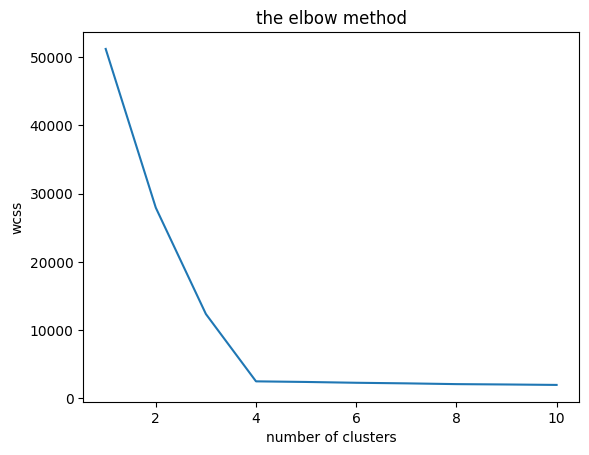

In [16]:
wcss=[]
for i in range (1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()



In [17]:
clusterers=KMeans(n_clusters=4,random_state=1)
cluster_label=clusterers.fit_predict(x)
print(cluster_label)

[3 2 3 2 1 0 1 1 0 1 1 2 1 1 2 1 3 0 2 2 1 0 3 3 1 1 0 2 0 2 1 1 1 1 3 3 0
 1 2 3 3 3 2 0 2 0 1 0 3 1 0 1 3 2 2 2 0 1 2 2 0 3 2 3 2 1 1 3 1 1 1 0 2 1
 2 3 0 1 2 0 2 2 0 0 0 3 3 2 3 2 1 1 0 1 0 1 2 1 3 3 0 3 2 3 2 0 1 0 0 1 3
 2 3 3 1 3 1 0 1 0 0 3 1 0 3 0 3 2 3 3 0 0 0 3 2 0 2 1 3 2 2 0 0 2 1 0 1 0
 2 1 1 0 0 0 0 3 3 1 0 1 2 2 0 2 1 2 1 1 1 1 0 0 0 0 2 0 2 0 3 3 2 3 0 2 1
 2 1 0 2 1 2 1 2 0 1 0 2 2 1 0 2 0 1 3 1 0 1 1 0 0 0 0 0 0 2 3 1 2 1 1 3 0
 2 0 3 1 3 1 1 3 1 1 3 1 1 0 1 1 3 3 1 2 3 1 0 2 2 0 2 3 3 2 2 3 1 1 3 0 1
 1 1 0 3 3 1 2 2 3 0 2 3 0 2 0 1 2 2 2 2 3 2 1 0 2 2 1 0 0 2 2 2 2 1 0 1 3
 0 1 3 3 0 3 0 1 0 3 3 1 2 1 3 0 3 0 0 1 1 2 3 2 3 3 0 1 1 3 1 0 2 0 3 0 2
 3 3 0 0 3 2 2 1 3 2 0 3 0 0 1 3 1 0 1 0 0 2 1 1 3 3 3 2 3 2 3 3 3 2 2 0 0
 2 3 3 3 2 3 0 0 0 3 1 1 2 2 0 1 2 1 2 2 1 0 3 1 3 3 2 1 2 1 0 2 3 3 2 2 3
 2 3 0 3 1 2 0 0 0 0 3 2 1 3 0 3 3 3 3 3 2 2 3 1 2 3 2 0 0 1 0 2 1 3 3 3 2
 2 0 1 3 2 1 2 2 3 0 2 0 1 2 1 2 0 0 1 3 2 2 1 3 0 3 1 2 0 3 3 2 2 0 2 1 1
 1 0 3 3 3 1 0 2 3 3 3 2 

For n_clusters = 2 The average silhouette_score is : 0.48483071174449893
For n_clusters = 3 The average silhouette_score is : 0.6574024131608862
For n_clusters = 4 The average silhouette_score is : 0.7812919040343649
For n_clusters = 5 The average silhouette_score is : 0.6311460665929901
For n_clusters = 6 The average silhouette_score is : 0.473153568032143


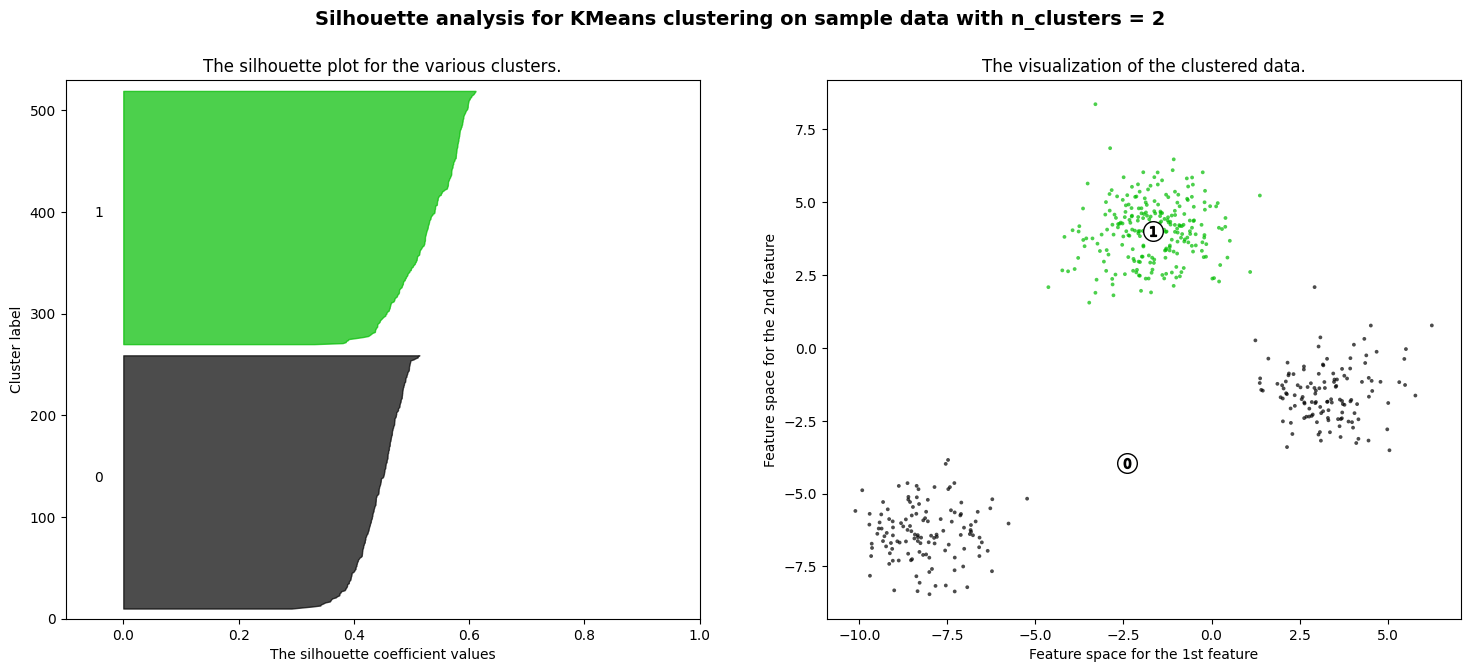

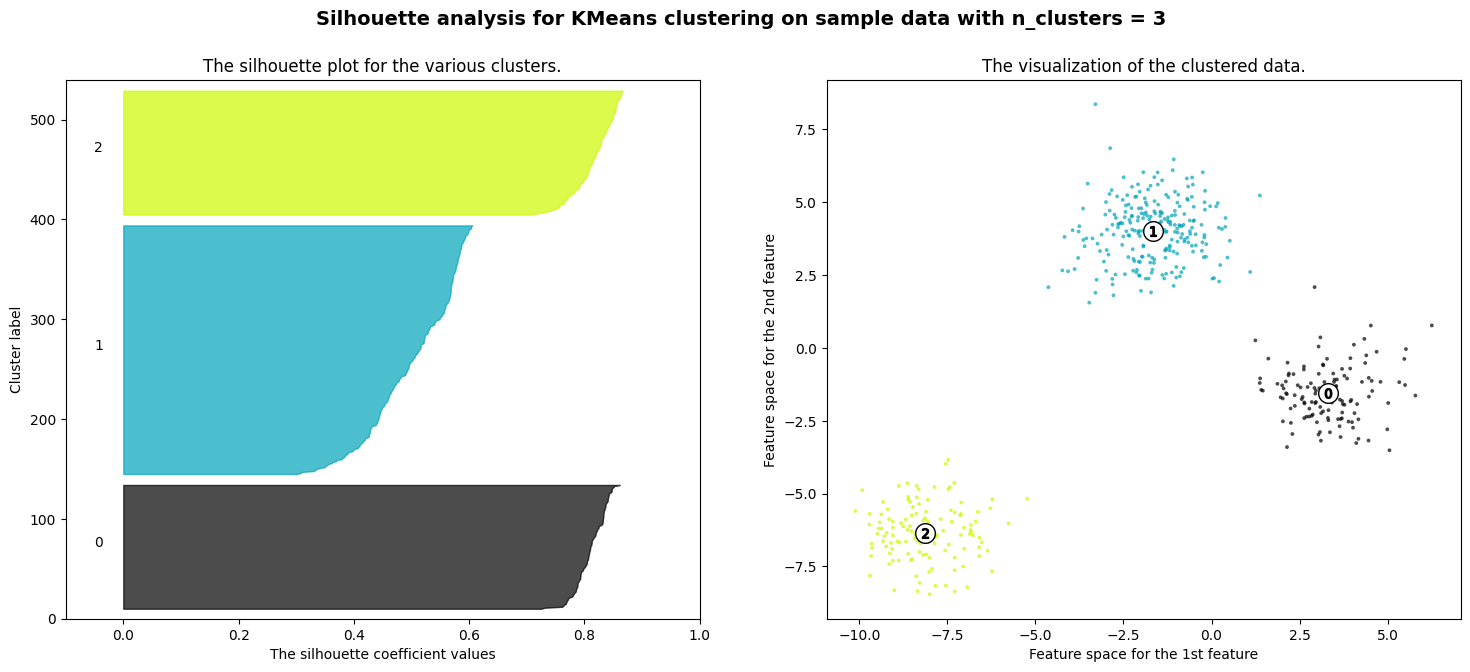

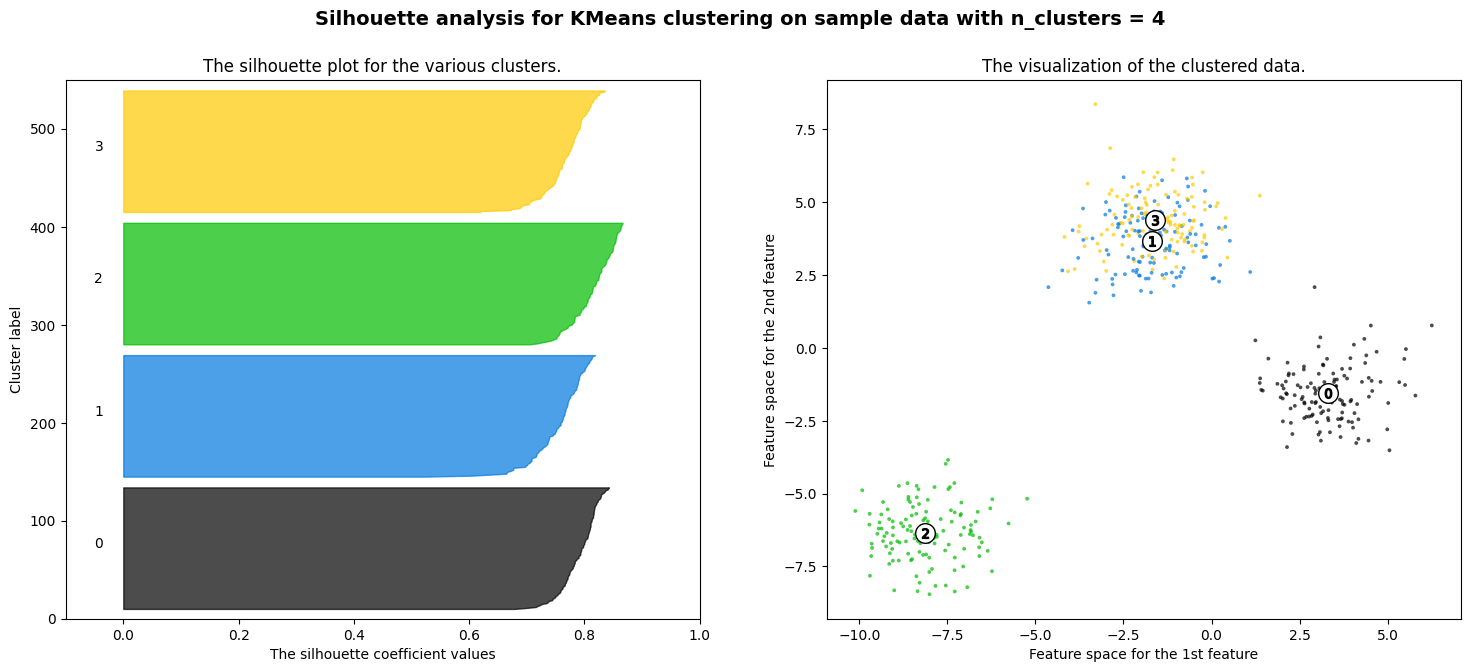

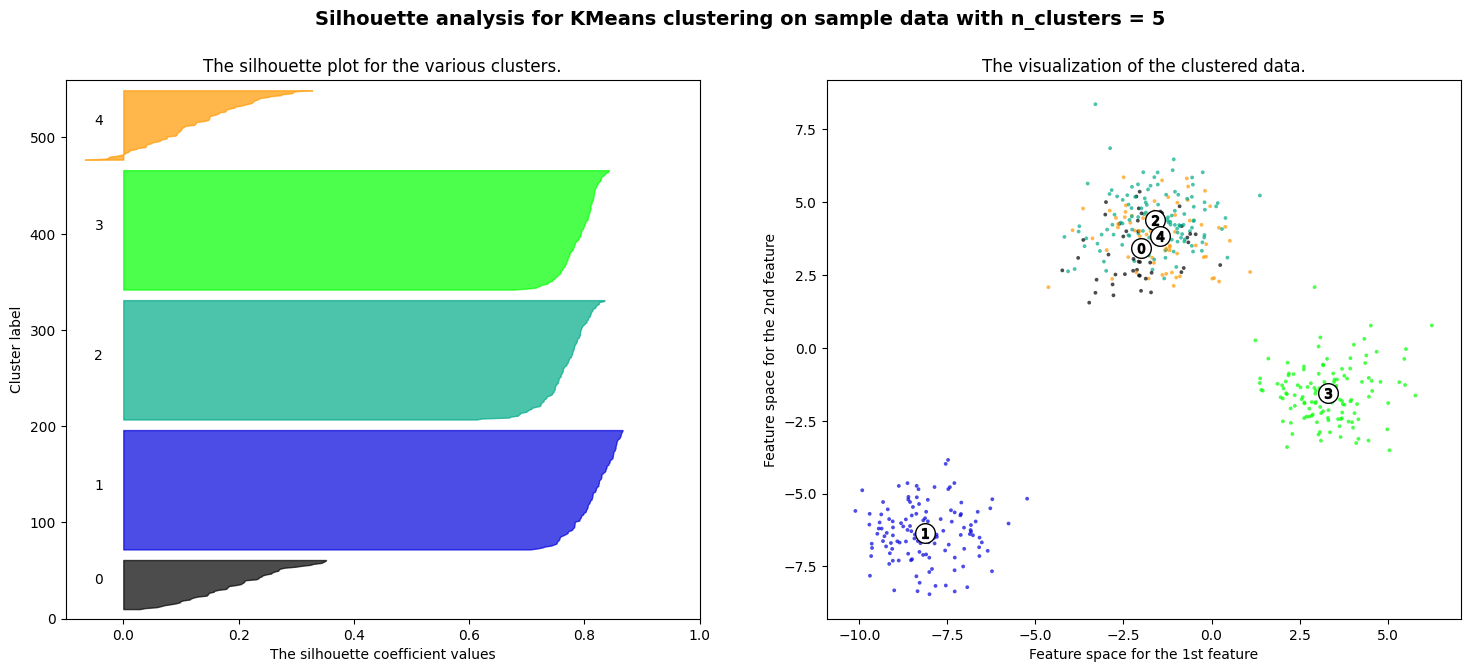

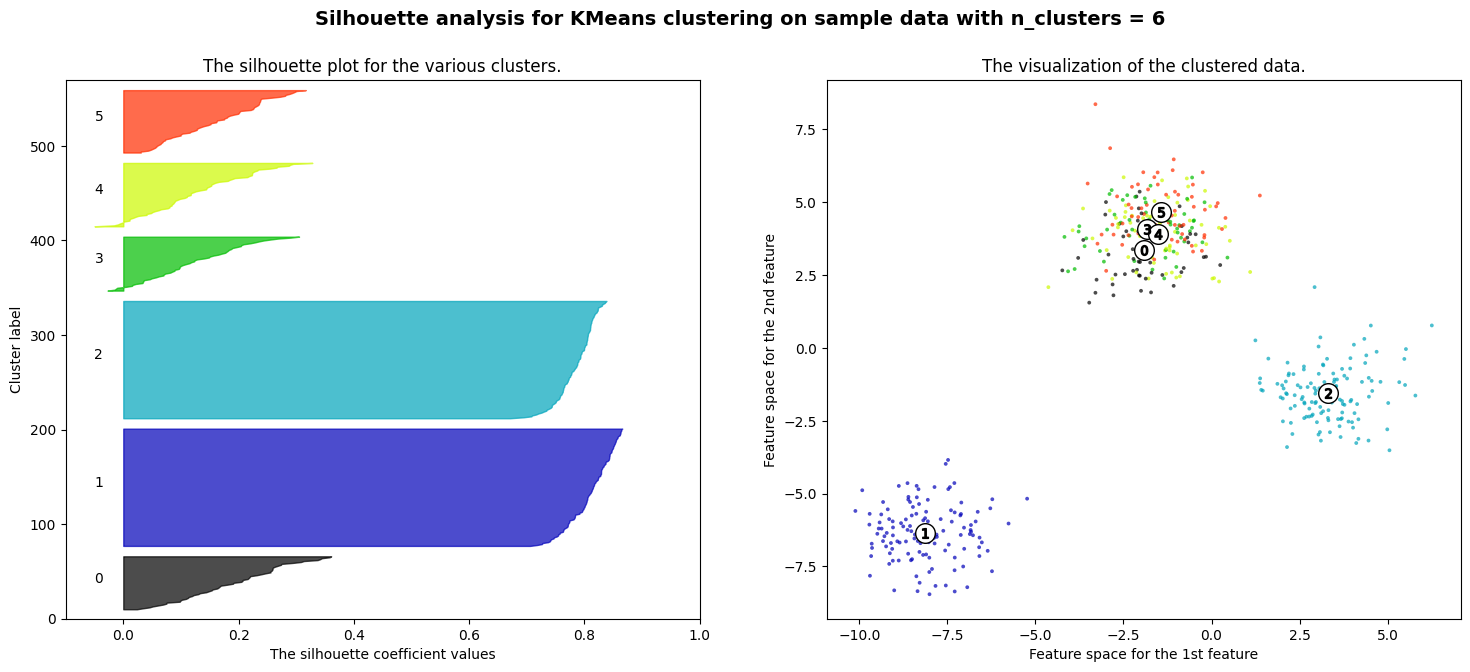

In [18]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init=10)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10* (n_clusters - i)
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # 2nd Plot showing the actual clusters colored by label
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        x[:, 0], x[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        ("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters),
        fontsize=14,
        fontweight="bold",
    )
plt.show()

Absolutely! Here's a breakdown of what each part does:

1.  **`%pip install scikit-learn` (Cell `08d1107a`):** This line is like telling your computer to get a new tool called "scikit-learn". This tool is really helpful for doing things like grouping data (which is what clustering is all about!). The `%pip install` part is a special command in this environment to install libraries.

2.  **Importing Libraries (Cell `-ILFaD2Aw_v_`):**
    *   `import pandas as pd`: This brings in a tool called "pandas", which is great for working with data in tables, like a spreadsheet. We give it a shorter name `pd` so it's easier to type.
    *   `import numpy as np`: This brings in a tool called "numpy", which is useful for working with numbers and lists of numbers very efficiently. We call it `np`.
    *   `from sklearn.cluster import KMeans`: From the "scikit-learn" tool we installed, we're specifically grabbing the "KMeans" part, which is a popular method for clustering.
    *   `from sklearn.metrics import silhouette_score, silhouette_samples`: Also from "scikit-learn", we're getting tools to measure how good our clustering is. `silhouette_score` gives an overall score, and `silhouette_samples` gives scores for each individual data point.
    *   `from sklearn.datasets import make_blobs`: This is another part of "scikit-learn" that helps us create some fake data to practice with.
    *   `import matplotlib.pyplot as plt`: This imports a tool called "matplotlib", which is fantastic for making plots and charts. We call it `plt`.
    *   `import matplotlib.cm as cm`: This is another part of "matplotlib" that helps us with colors for our plots.

3.  **Creating Sample Data (Cell `L4LGcBOdxN_n`):**
    *   `x,y =make_blobs(n_samples=500,n_features=5,random_state=1,centers=4,shuffle=True,center_box=(-10.0,10.0))`: This line uses the `make_blobs` tool to create some sample data.
        *   `n_samples=500`: We're making 500 fake data points.
        *   `n_features=5`: Each data point will have 5 characteristics (or features).
        *   `random_state=1`: This helps make sure we get the same fake data every time we run the code.
        *   `centers=4`: We're telling it to create data that looks like it naturally falls into 4 groups.
        *   `shuffle=True`: Mix up the data points.
        *   `center_box=(-10.0,10.0)`: This puts the centers of the groups within a certain range.
    *   `range_n_clusters=[2,3,4,5,6]`: This creates a list of different numbers of clusters that we want to try out later (2, 3, 4, 5, and 6).

4.  **The Elbow Method (Cell `ZKJ17OQixaxE`):**
    *   `wcss=[]`: We create an empty list called `wcss` (which stands for Within-Cluster Sum of Squares). This will help us figure out a good number of clusters.
    *   `for i in range (1,11):`: We're going to do something 10 times, trying out 1 to 10 clusters.
    *   `kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)`: For each number of clusters (`i`), we set up the KMeans tool. `init='k-means++'` is a smart way to start the clustering. `random_state=42` helps make it repeatable.
    *   `kmeans.fit(x)`: We tell the KMeans tool to look at our fake data (`x`) and find the clusters.
    *   `wcss.append(kmeans.inertia_)`: After finding the clusters, we calculate the `inertia_` (which is the WCSS) and add it to our `wcss` list.
    *   `plt.plot(range(1,11),wcss)`: We use the plotting tool to draw a line graph. The bottom of the graph is the number of clusters (1 to 10), and the side is the `wcss` value.
    *   The rest of the lines add a title and labels to the graph and then show it (`plt.show()`). This graph helps us see where the "elbow" is, which is often a good indicator of the right number of clusters.

5.  **Running KMeans with 4 Clusters (Cell `Q41Use6o2ozC`):**
    *   `clusterers=KMeans(n_clusters=4,random_state=1)`: We set up the KMeans tool again, specifically saying we want 4 clusters this time. `random_state=1` is for repeatability.
    *   `cluster_label=clusterers.fit_predict(x)`: We tell the tool to find the 4 clusters in our data (`x`) and then give each data point a label indicating which cluster it belongs to.
    *   `print(cluster_label)`: This shows us the labels for each data point.

6.  **Silhouette Analysis (Cell `SOUoLwYo3l3J`):** This is the most detailed part and it helps us evaluate how well the clustering worked for different numbers of clusters.
    *   `for n_clusters in range_n_clusters:`: We loop through the different numbers of clusters we listed earlier (2, 3, 4, 5, and 6).
    *   `fig, (ax1, ax2) = plt.subplots(1, 2)`: For each number of clusters, we create a figure with two side-by-side plots.
    *   `fig.set_size_inches(18, 7)`: We set the size of the figure.
    *   `ax1.set_xlim([-0.1, 1])` and `ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])`: These set the boundaries for the first plot (the silhouette plot).
    *   `clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init=10)`: We set up the KMeans tool for the current number of clusters. `n_init=10` means it will try running the clustering 10 times with different starting points and pick the best one.
    *   `cluster_labels = clusterer.fit_predict(x)`: We find the clusters and get the labels for each data point.
    *   `silhouette_avg = silhouette_score(x, cluster_labels)`: We calculate the average silhouette score for this number of clusters. A higher score generally means better clustering.
    *   `print(...)`: We print the average silhouette score.
    *   `sample_silhouette_values = silhouette_samples(x, cluster_labels)`: We calculate the silhouette score for each individual data point.
    *   The code then goes through each cluster and plots the silhouette scores for the data points in that cluster as colored bars on the left plot (`ax1`). The width of each bar represents the silhouette score.
    *   The second plot (`ax2`) shows the actual data points, colored by their assigned cluster. The centers of the clusters are also marked with circles.
    *   Finally, `plt.suptitle(...)` adds a main title to the figure, and `plt.show()` displays the plots.

By looking at the silhouette plots and the average silhouette scores for different numbers of clusters, you can get a better idea of which number of clusters fits your data best. A good silhouette plot will have most of the bars close to 1, and the clusters will be clearly separated in the scatter plot.